# Label distribution

In [1]:
import pandas as pd
import numpy as np 
import glob
from os.path import join 
import seaborn as sns
import matplotlib.pyplot as plt
import sys

if sys.platform == 'darwin':
    from matplotlib import rc
    rc("font", **{"family": "serif", "serif": ["Palatino"]})
    rc("text", usetex = True)


DATA_DIR = "/ritter/share/data/IMAGEN/IMAGEN_RAW/2.7"

In [2]:
# Get label information from ESPAD
dfe = pd.read_csv('/ritter/share/data/IMAGEN/IMAGEN_RAW/2.7/FU2/psytools/IMAGEN-IMGN_ESPAD_CHILD_FU2-IMAGEN_DIGEST.csv')
dfe = dfe.rename(columns={"User code":"ID"})
dfe.ID = dfe.ID.str.replace("-C","")
dfe = dfe[["ID", "19a"]]

tc = pd.read_csv(join("/ritter/share/data/IMAGEN/qs/FU3/participants/IMAGEN_demographics.csv"), dtype={"PSC2":str})
tc = tc.rename(columns={"PSC2" : "ID", "recruitment centre":"center"})

dfe = pd.merge(dfe, tc, "left")

# Get subjects included in the analysis and their sex and site
subs = pd.read_csv("/ritter/share/data/IMAGEN/h5files/ESPAD19a_01_56/fs-stats/fs-stats_FU2-FU2_n789.csv", dtype={"ID":str})
subs = subs[["ID", "label"]]

dfe = pd.merge(dfe, subs, "left")
#dfe

/home/evert/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (84,140,158,174,190,191,195,218,220,221,287,298) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


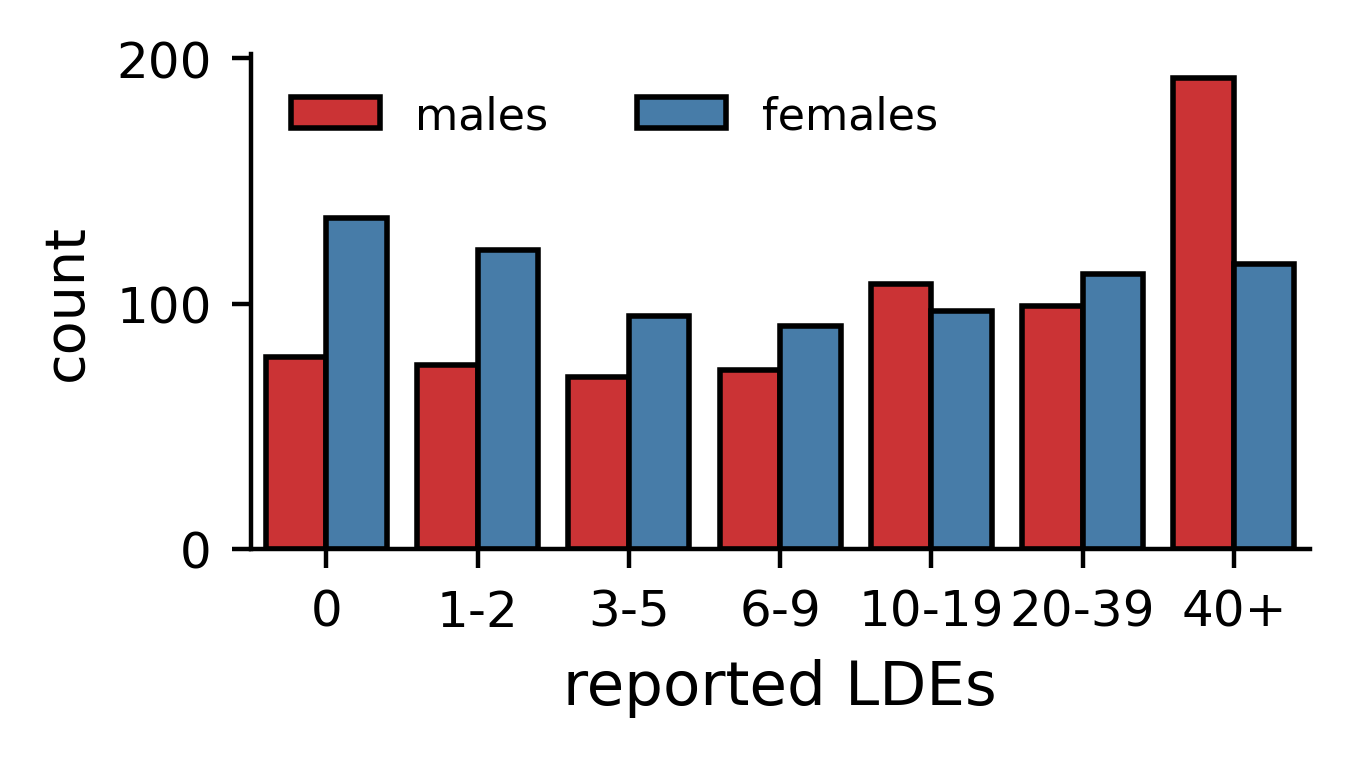

In [3]:
plt.figure(figsize=(3.5, 2), dpi=400)
sns.set_palette(sns.color_palette("Set1"))
sns.countplot(x="19a", hue="sex", data=dfe, edgecolor="k")
sns.despine()
plt.tight_layout()
plt.xlabel("reported LDEs", fontsize=11)
plt.yticks(fontsize=9)
plt.xticks(range(0, 7), ["0", "1-2", "3-5", "6-9", "10-19", "20-39", "40+"], fontsize=9)
plt.ylabel("count")
plt.legend(labels=["males", "females"], frameon=False, fontsize=8, ncol=2)
plt.show()

/home/evert/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


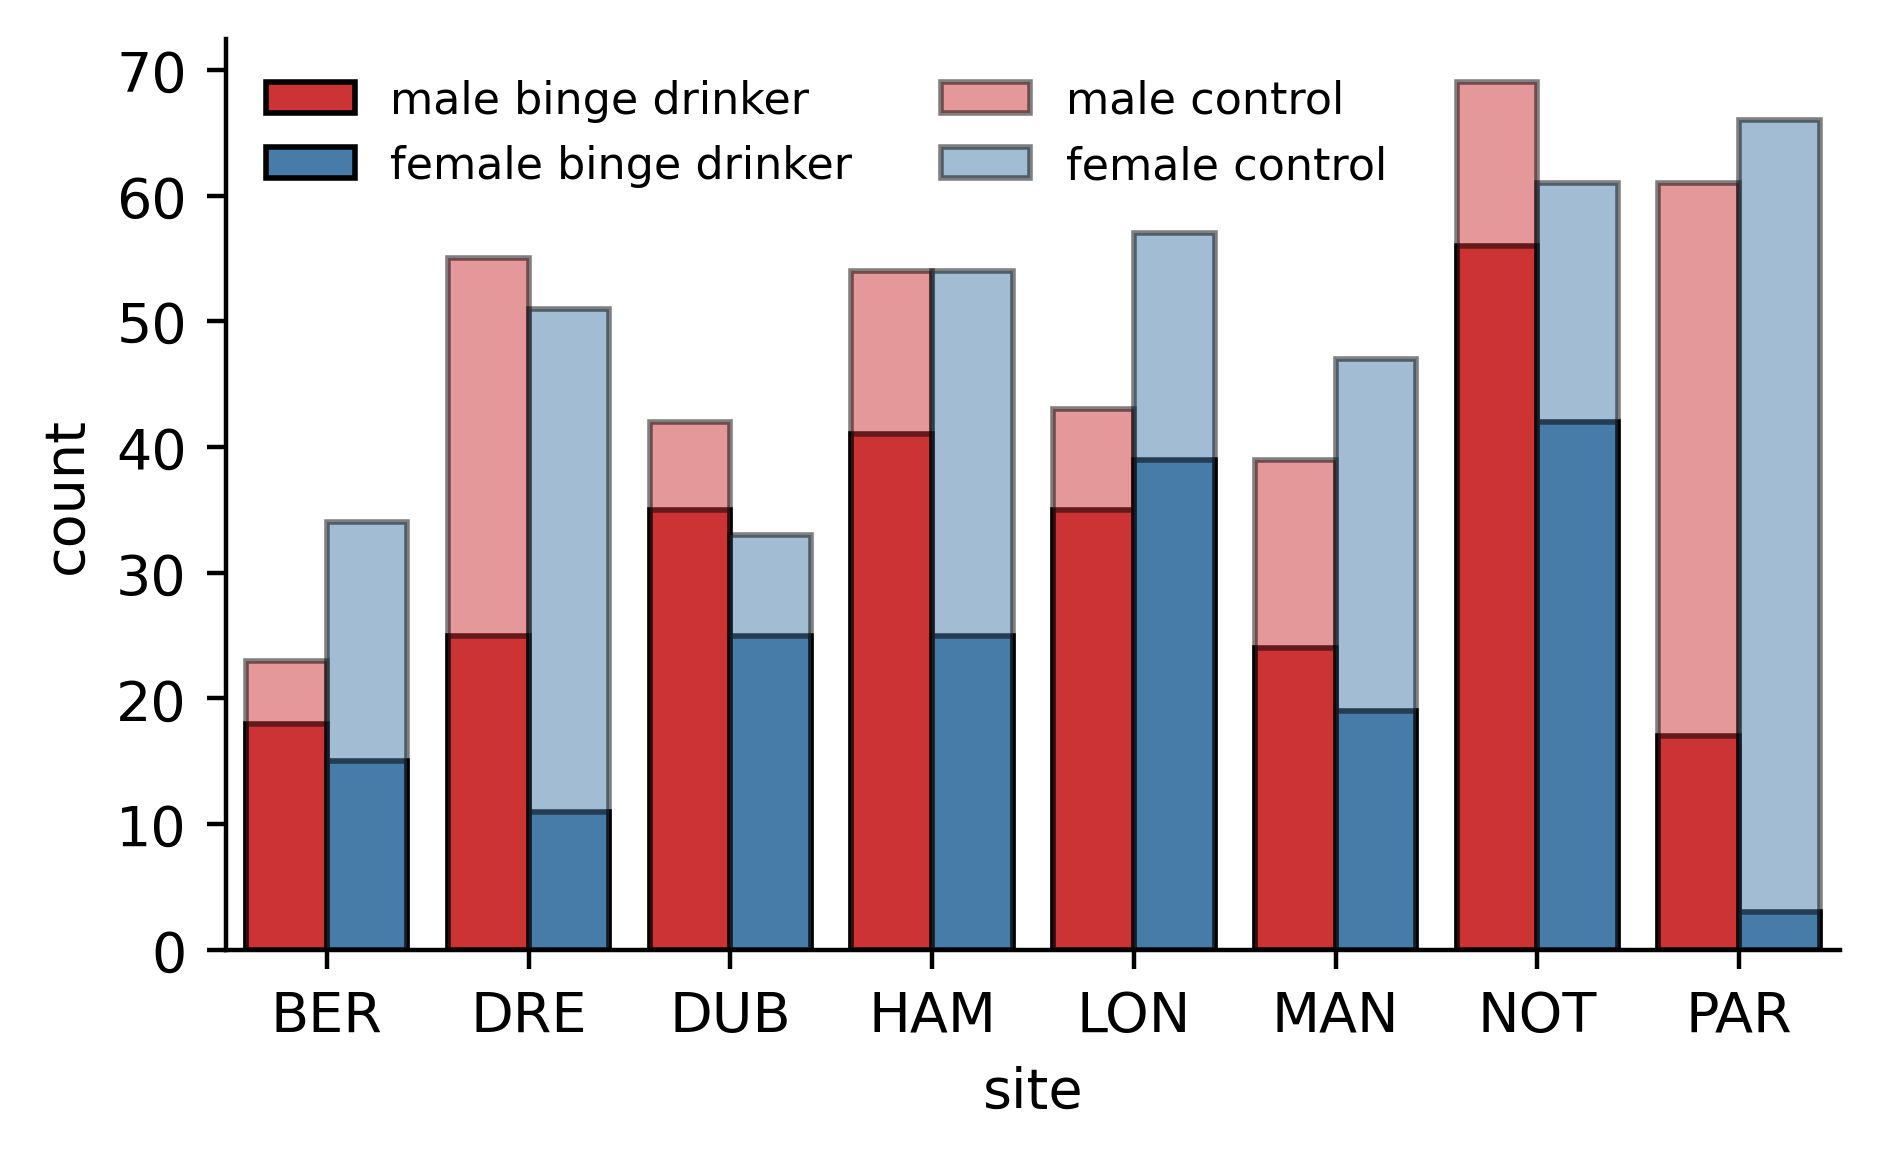

In [4]:
df_id = dfe.dropna(subset=["label"])


df_id.sex = df_id.sex.map({
    "F":1,
    "M":0
})

df_id.center = df_id.center.map({
    "NOTTINGHAM" : "NOT", 
    "BERLIN" : "BER", 
    "MANNHEIM" : "MAN", 
    "HAMBURG" : "HAM", 
    "LONDON" : "LON", 
    "DRESDEN" : "DRE", 
    "PARIS" : "PAR", 
    "DUBLIN" : "DUB"
})

df_id = df_id.sort_values(["center", "sex"])

df_id.sex = df_id.sex.map({
    0:"male", 
    1:"female"
})

fig = plt.figure(figsize=(4.8, 3), dpi= 400)
dfx = df_id.query("label == 1")
a = sns.countplot(x="center", hue="sex", data=dfx, edgecolor="k", palette="Set1", alpha=1)
al, ah = a.get_legend_handles_labels()

b = sns.countplot(x="center", hue="sex", data=df_id, edgecolor="k", palette="Set1", alpha=0.5)
bl, bh = b.get_legend_handles_labels()

sns.despine()
plt.tight_layout()
plt.xticks(fontsize=10)
plt.legend(labels=["male binge drinker", "female binge drinker", "male control", "female control"]\
           , frameon=False, fontsize=8, ncol=2)
plt.xlabel("site")
plt.ylabel("count")

fig.tight_layout()
sns.despine()

plt.show()